<a href="https://colab.research.google.com/github/AkuOO4/IMSC-Class/blob/main/SEM-5/Rclass/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 EDA on "Titanic Dataset"

You are given the Titanic dataset, which contains information about passengers on the Titanic, including their survival status, age, class, and gender.

a)plot the histogram of Number of parents and children of the passenger aboard(parch).

b)Perform a detailed EDA, including advanced statistical analysis, to explore factors influencing survival rates.

c)Create a customized box plot to visualize the age distribution of survivors and non-survivors.



In [ ]:
# Load necessary libraries
library(tidyverse)
titanic_data<-read.csv("train.csv")


In [ ]:
# library(titanic)
# data("Titanic")


NULL

In [ ]:
head(titanic_data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


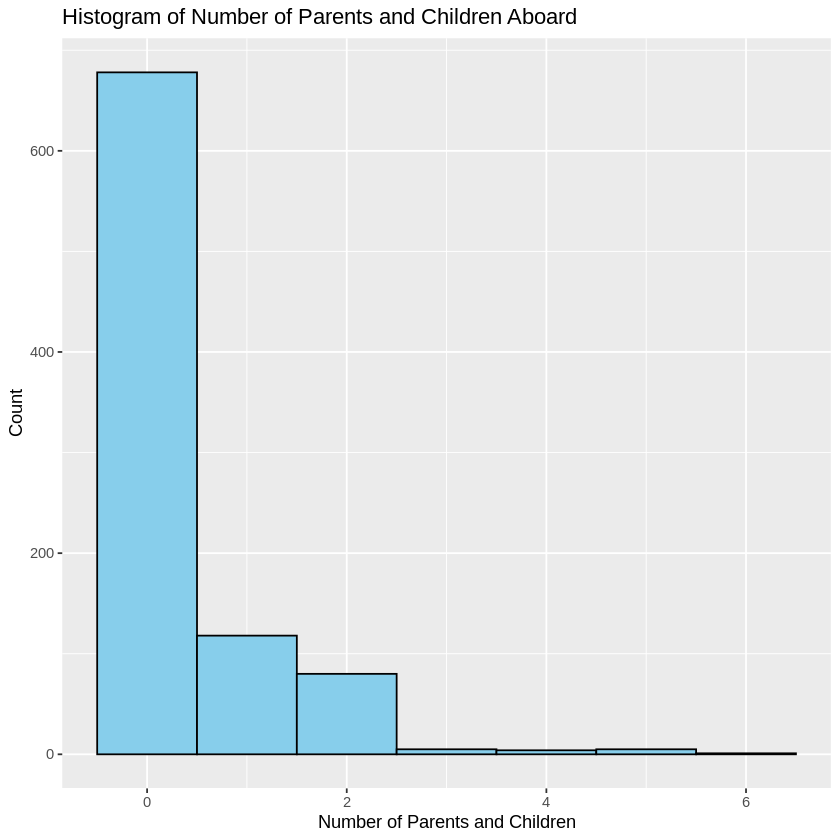

In [ ]:
ggplot(titanic_data, aes(x = Parch)) +
  geom_histogram(binwidth = 1, fill = "skyblue", color = "black") +
  labs(title = "Histogram of Number of Parents and Children Aboard",
       x = "Number of Parents and Children",
       y = "Count")


In [ ]:

# Summary statistics
summary(titanic_data)

# Correlation matrix
cor(titanic_data[, c("Survived", "Pclass", "Age", "SibSp", "Parch", "Fare")])



  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.00000000,-0.33848104,NA,-0.03532250,0.08162941,0.2573065
Pclass,-0.33848104,1.00000000,NA,0.08308136,0.01844267,-0.5494996
Age,NA,NA,1,NA,NA,NA
SibSp,-0.03532250,0.08308136,NA,1.00000000,0.41483770,0.1596510
Parch,0.08162941,0.01844267,NA,0.41483770,1.00000000,0.2162249
Fare,0.25730652,-0.54949962,NA,0.15965104,0.21622494,1.0000000



Call:
glm(formula = Survived ~ Pclass + Sex + Age + SibSp + Parch + 
    Fare, family = "binomial", data = titanic_data)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  5.389003   0.603734   8.926  < 2e-16 ***
Pclass      -1.242249   0.163191  -7.612 2.69e-14 ***
Sexmale     -2.634845   0.219609 -11.998  < 2e-16 ***
Age         -0.043953   0.008179  -5.374 7.70e-08 ***
SibSp       -0.375755   0.127361  -2.950  0.00317 ** 
Parch       -0.061937   0.122925  -0.504  0.61436    
Fare         0.002160   0.002493   0.866  0.38627    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 964.52  on 713  degrees of freedom
Residual deviance: 635.81  on 707  degrees of freedom
  (177 observations deleted due to missingness)
AIC: 649.81

Number of Fisher Scoring iterations: 5


Warning message:
“Removed 177 rows containing non-finite values (`stat_boxplot()`).”


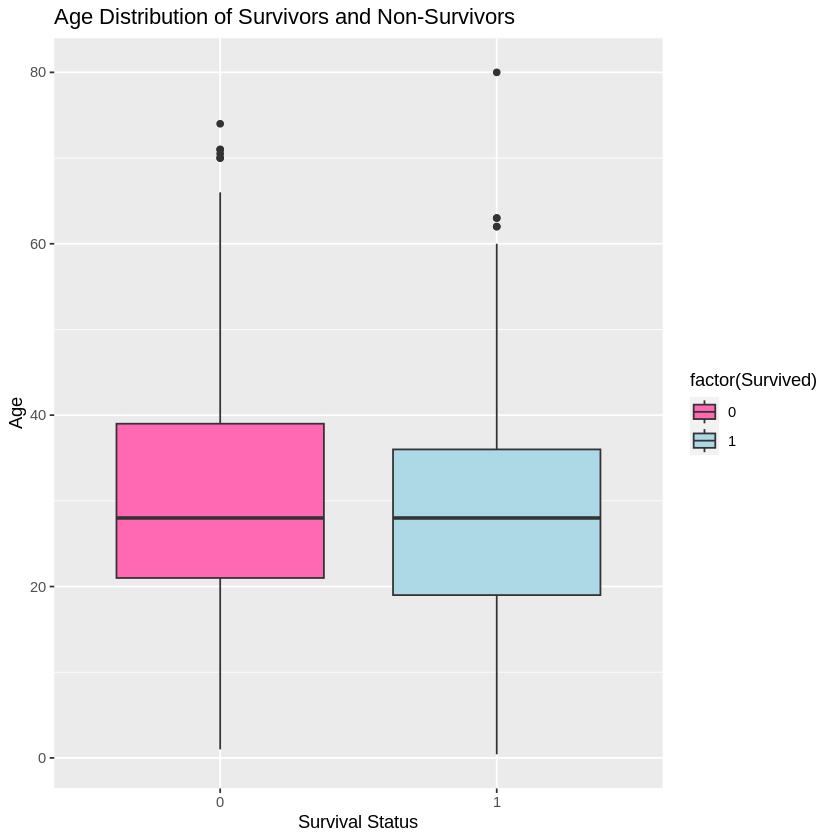

In [ ]:
# Logistic regression for survival prediction
model <- glm(Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare,
             data = titanic_data, family = "binomial")
summary(model)



Warning message:
“Removed 177 rows containing non-finite values (`stat_boxplot()`).”


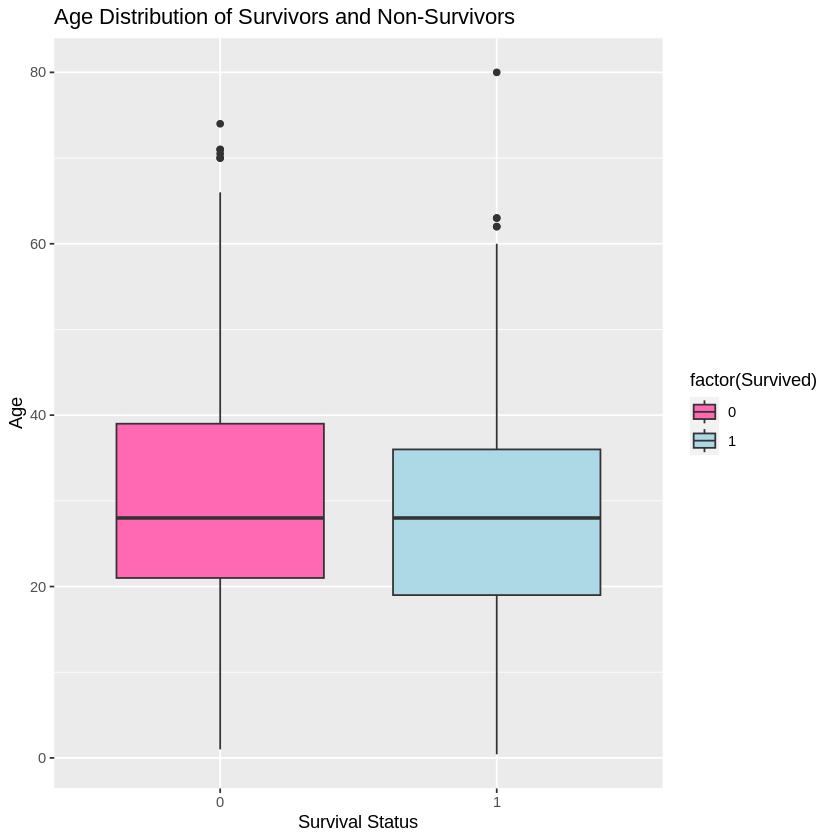

In [ ]:
# c) Customized box plot for age distribution of survivors and non-survivors
surv_boxplot <- ggplot(titanic_data, aes(x = factor(Survived), y = Age, fill = factor(Survived))) +
  geom_boxplot() +
  labs(title = "Age Distribution of Survivors and Non-Survivors",
       x = "Survival Status",
       y = "Age") +
  scale_fill_manual(values = c("hotpink", "lightblue"))

print(surv_boxplot)